In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import comb

reg_id_df = pd.read_csv("registry_ids.csv")
loc_ids=reg_id_df.iloc[:,0]

In [2]:

def read_and_process_file(file_path):
    result_list = []

    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()

            # Extract every second line
            for i in range(1, len(lines), 2):
                line = lines[i].strip()

                # Split the line into a list of integers
                integer_series = list(map(int, line.split()))

                result_list.append(integer_series)

        return result_list

    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None
    except Exception as e:
        print("An error occurred:", e)
        return None

def normalize_read_list(list):
    line_counter=0
    for line in list:
        sum=0
        for element in line:
            sum=sum+element
        element_counter=0
        for element in line:
            list[line_counter][element_counter]=element/sum
            element_counter+=1
        line_counter+=1

def create_histogram(x, y, xlabel='X-axis', ylabel='Y-axis', title='Histogram'):
    x = np.array(x)
    y = np.array(y)
    plt.figure(figsize=(8, 6))
    plt.hist(x, bins=np.arange(min(x), max(x) + 1) - 0.5, weights=y, edgecolor='black', alpha=0.7)
    plt.xlabel(xlabel, fontname='Times New Roman', fontsize=12)
    plt.ylabel(ylabel, fontname='Times New Roman', fontsize=12)
    #plt.title(title, fontname='Times New Roman', fontsize=12)
    plt.xticks(fontname='Times New Roman', fontsize=12)
    plt.yticks(fontname='Times New Roman', fontsize=12)

    plt.xticks(np.arange(min(x), max(x) + 1))
    plt.savefig("2d_histogram.png", dpi=300)   
    plt.show()

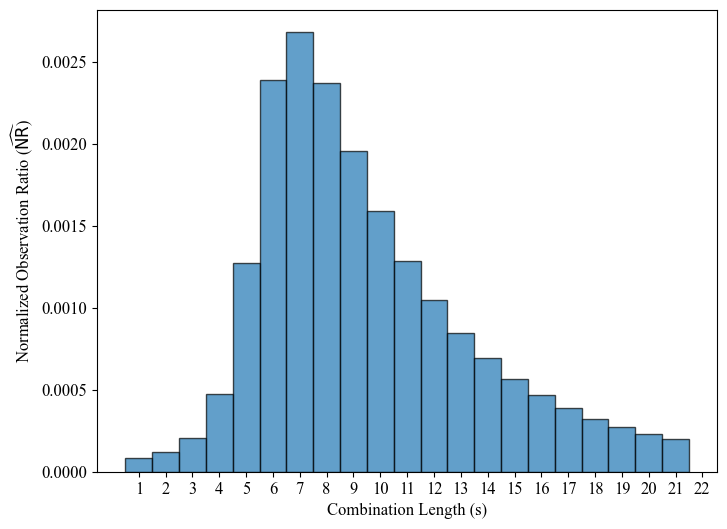

In [3]:

master_top_10=[[0,0] for i in range(20)]
file_name="recorder.txt"
read_list=read_and_process_file(file_name)
normalize_read_list(read_list)
best_res=np.array(read_list)[:,15884]

x=[i for i in range(1,23)]
create_histogram(x,best_res,xlabel="Combination Length (s)",ylabel="Normalized Observation Ratio ($\widehat{\mathrm{NR}}$)")
print()

In [4]:
records = np.array(read_list)
records = np.transpose(records)
print(records.shape)
print(reg_id_df.shape)

(16057, 22)
(16057, 1)


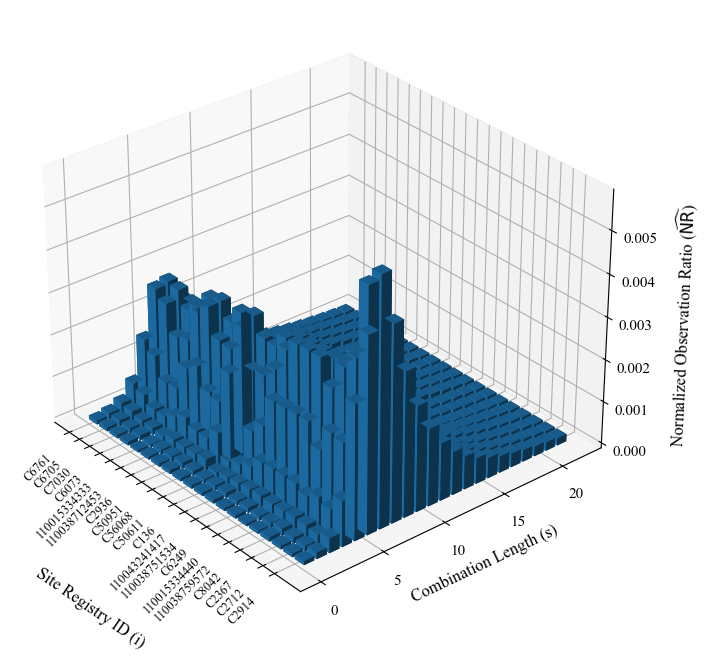

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Matplotlib font setting
plt.rcParams['font.family'] = ['Times New Roman']

# Assuming `records` is a (16057, 22) numpy array
# Assuming `reg_id_df` is a DataFrame with at least one column for names

# Step 1: Compute row sums
row_sums = np.sum(records, axis=1)

# Step 2: Get indices of top 20 rows
top_20_indices = np.argsort(row_sums)[-20:][::-1]  # Descending order

# Step 3: Retrieve names for these indices
top_20_names = reg_id_df.iloc[top_20_indices, 0].values  # Assuming names are in the first column

# Step 4: Extract top 20 rows while keeping original column order
top_20_data = records[top_20_indices, :]

# Step 5: Reverse the x-axis order
top_20_names = top_20_names[::-1]
top_20_data = top_20_data[::-1, :]  # Reverse row order

# Step 6: Plot 3D histogram with swapped x and y axes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(np.arange(20), np.arange(22))  # Swapping axes (rows=20, cols=22)
xpos = xpos.flatten()
ypos = ypos.flatten()

zpos = np.zeros_like(xpos)
values = top_20_data.T.flatten()  # Transpose to match swapped axes

dx = dy = 0.8  # Bar width
dz = values

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)

# Font settings
figfont = {'fontname': 'Times New Roman'}

# Axis labels with requested settings
ax.set_xlabel('Site Registry ID (i)', figfont, fontsize=12, labelpad=40)
ax.set_ylabel('Combination Length (s)', figfont, fontsize=12)
ax.set_zlabel(r'Normalized Observation Ratio ($\widehat{\mathrm{NR}}$)', 
              figfont, fontsize=12, labelpad=10)

# Tick label formatting
plt.xticks(fontname="Times New Roman", fontsize=9)
plt.yticks(fontname="Times New Roman", fontsize=11)
for t in ax.zaxis.get_major_ticks(): 
    t.label.set_font('Times New Roman')
    t.label.set_fontsize(11)

# Rotate x-axis tick labels
x_labels = [str(x) for x in top_20_names]
x_list = list(range(20))
plt.xticks(x_list, x_labels, rotation=45, ha='right')

# Adjust view angle
ax.view_init(azim=ax.azim + 20)

# Save figure
plt.savefig("3d_rotated_image.png", dpi=500)

plt.show()